In [44]:
from load_csv import load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
income_df = load('../resources/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_df.head()

loading dataset of dimensions (195, 251)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,683,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
Angola,700,702,705,709,711,714,718,721,725,727,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
Albania,755,755,755,755,755,756,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,1170,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


In [32]:
income_df = income_df.dropna()
income_df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,683,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
Angola,700,702,705,709,711,714,718,721,725,727,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
Albania,755,755,755,755,755,756,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,1170,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,...,8860,9050,9250,9440,9650,9860,10.1k,10.3k,10.5k,10.7k
Yemen,993,995,998,1000,1000,1010,1010,1010,1020,1020,...,3750,3830,3910,3990,4080,4170,4260,4350,4440,4540
South Africa,1780,1760,1740,1720,1700,1610,1610,1750,1530,1490,...,16.2k,16.6k,16.9k,17.3k,17.7k,18.1k,18.5k,18.8k,19.3k,19.7k


In [33]:
def convert_population(val: str) -> int:
    if isinstance(val, str):
        val = val.strip().lower()
        if val.endswith('b'):
            return int(float(val[:-1]) * 1_000_000_000)
        elif val.endswith('m'):   # ล้าน
            return int(float(val[:-1]) * 1_000_000)
        elif val.endswith('k'): # พัน
            return int(float(val[:-1]) * 1_000)
        else:  # ไม่มี suffix
            return int(float(val))
    return val

income_df = income_df.map(convert_population)
income_df

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,683,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
Angola,700,702,705,709,711,714,718,721,725,727,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
Albania,755,755,755,755,755,756,756,756,756,756,...,25100,25600,26200,26700,27300,27900,28500,29100,29700,30400
Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,1380,...,68900,70400,71900,73400,75000,76600,78300,80000,81700,83400
United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,1170,...,101000,103000,105000,107000,110000,112000,114000,117000,119000,122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,...,8860,9050,9250,9440,9650,9860,10100,10300,10500,10700
Yemen,993,995,998,1000,1000,1010,1010,1010,1020,1020,...,3750,3830,3910,3990,4080,4170,4260,4350,4440,4540
South Africa,1780,1760,1740,1720,1700,1610,1610,1750,1530,1490,...,16200,16600,16900,17300,17700,18100,18500,18800,19300,19700


In [34]:
life_df = load('../resources/life_expectancy_years.csv')
life_df.iloc[:, :5]

loading dataset of dimensions (195, 301)


,1800,1801,1802,1803,1804
country,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2
Angola,27.0,27.0,27.0,27.0,27.0
Albania,35.4,35.4,35.4,35.4,35.4
Andorra,NaN,NaN,NaN,NaN,NaN
United Arab Emirates,30.7,30.7,30.7,30.7,30.7
...,...,...,...,...,...
Samoa,25.4,25.4,25.4,25.4,25.4
Yemen,23.4,23.4,23.4,23.4,23.4
South Africa,33.5,33.5,33.5,33.5,33.5


In [35]:
life_df = life_df.dropna()
life_df.iloc[:, :5]

,1800,1801,1802,1803,1804
country,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2
Angola,27.0,27.0,27.0,27.0,27.0
Albania,35.4,35.4,35.4,35.4,35.4
United Arab Emirates,30.7,30.7,30.7,30.7,30.7
Argentina,33.2,33.2,33.2,33.2,33.2
...,...,...,...,...,...
Samoa,25.4,25.4,25.4,25.4,25.4
Yemen,23.4,23.4,23.4,23.4,23.4
South Africa,33.5,33.5,33.5,33.5,33.5


In [40]:
expect_year = '1900'

In [41]:
life_series = life_df[expect_year]
life_series

country
Afghanistan             33.3
Angola                  32.6
Albania                 34.9
United Arab Emirates    35.4
Argentina               37.2
                        ... 
Samoa                   27.4
Yemen                   26.6
South Africa            36.0
Zambia                  34.3
Zimbabwe                35.3
Name: 1900, Length: 186, dtype: float64

In [42]:
income_series = income_df[expect_year]
income_series

country
Afghanistan             1050
Angola                   779
Albania                 1270
Andorra                 3620
United Arab Emirates    3310
                        ... 
Samoa                   2090
Yemen                   1320
South Africa            1740
Zambia                   957
Zimbabwe                1110
Name: 1900, Length: 195, dtype: int64

In [43]:
df = pd.DataFrame({'life': life_series, 'income': income_series}).dropna()
df

,life,income
country,,
Afghanistan,33.3,1050
Albania,34.9,1270
Algeria,32.2,1860
Angola,32.6,779
Antigua and Barbuda,33.7,1470
...,...,...
Venezuela,33.2,2150
Vietnam,32.1,1210
Yemen,26.6,1320


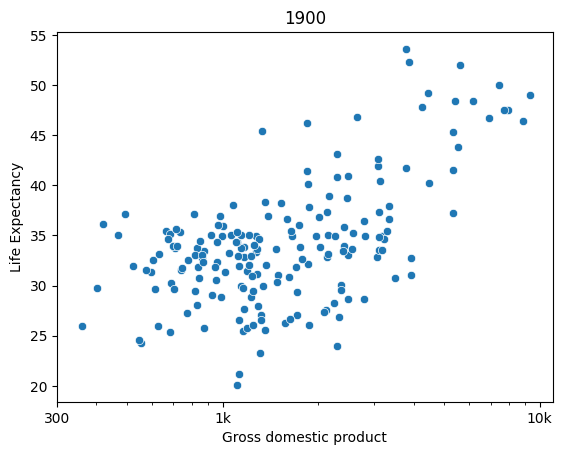

In [59]:
sns.scatterplot(df, x='income', y='life')
plt.xscale('log')
plt.xticks([300, 1000, 10000], ['300', '1k', '10k'])
plt.xlabel('Gross domestic product')
plt.ylabel('Life Expectancy')
plt.title(expect_year)
plt.show()